# Download Dataset

Toxicity, aggression, and personal attacks datasets are available in following links.
- [Toxicity](https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Toxicity/4563973)
- [Aggression](https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Aggression/4267550)
- [Personal Attacks](https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Personal_Attacks/4054689)

In case these links are unavailable, the download datasets are included in `a2/data` directory.


In [1]:
!curl -C - https://ndownloader.figshare.com/articles/4563973/versions/2 --create-dirs -o data/4563973.zip
!curl -C - https://ndownloader.figshare.com/articles/4267550/versions/5 --create-dirs -o data/4267550.zip
!curl -C - https://ndownloader.figshare.com/articles/4054689/versions/6 --create-dirs -o data/4054689.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  109M  100  109M    0     0  60.2M      0  0:00:01  0:00:01 --:--:-- 60.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84.6M  100 84.6M    0     0  61.8M      0  0:00:01  0:00:01 --:--:-- 61.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  100M  100  100M    0     0  68.3M      0  0:00:01  0:00:01 --:--:-- 68.3M


These downloaded datasets are `.zip` files, and these are extracted with following command.

In [2]:
!unzip "data/*.zip" -d data/

Archive:  data/4267550.zip
 extracting: data/aggression_annotated_comments.tsv  
 extracting: data/aggression_annotations.tsv  
 extracting: data/aggression_worker_demographics.tsv  

Archive:  data/4563973.zip
 extracting: data/toxicity_annotations.tsv  
 extracting: data/toxicity_annotated_comments.tsv  
 extracting: data/toxicity_worker_demographics.tsv  

Archive:  data/4054689.zip
 extracting: data/attack_annotated_comments.tsv  
 extracting: data/attack_annotations.tsv  
 extracting: data/attack_worker_demographics.tsv  

3 archives were successfully processed.


## Import packages

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Analysis

## Analysis 1: Personal Attacks

### Read Personal Attacks dataset

In [4]:
attack_annotated_comments = pd.read_csv('data/attack_annotated_comments.tsv', sep='\t', header=0)
attack_annotations = pd.read_csv('data/attack_annotations.tsv', sep='\t', header=0)
attack_worker_demographics = pd.read_csv('data/attack_worker_demographics.tsv', sep='\t', header=0)

In [5]:
attack_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


### Analyze distribution of workers
 	
Analyze the demographic information about the Crowdflower workers that is available in the Personal Attacks dataset

We want to see if the workers are biased, which would result in biased labels. Therefore, we try to analyze the demographics of the workers - gender, education, and whether english is their first language.

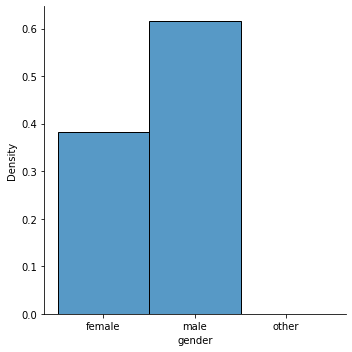

In [6]:
gender_hist = sns.displot(attack_worker_demographics, x='gender', stat='density')
gender_hist.savefig("PA_gender_hist.png")

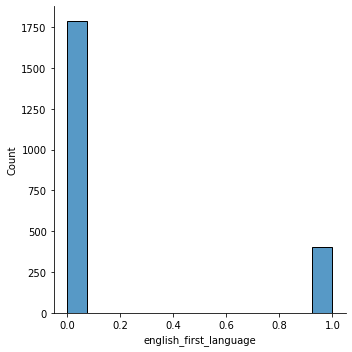

In [7]:
english_hist = sns.displot(attack_worker_demographics, x='english_first_language')
english_hist.savefig("PA_english_hist.png")

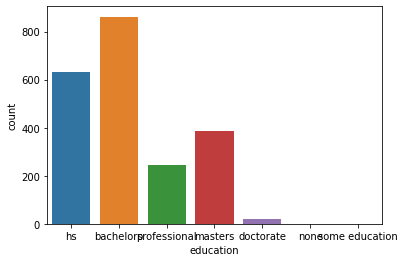

In [8]:
education_hist = sns.countplot(data=attack_worker_demographics, x='education', order=['hs', 'bachelors', 'professional', 'masters', 'doctorate', 'none', 'some education'])
education_hist.figure.savefig("PA_education_hist.png")

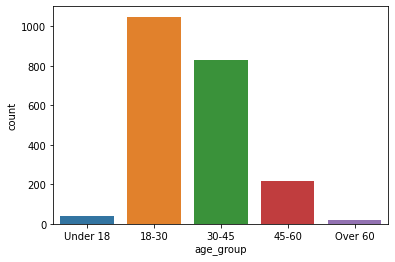

In [9]:
age_group_count = sns.countplot(data=attack_worker_demographics, x="age_group", order=['Under 18', '18-30', '30-45', '45-60', 'Over 60'])
age_group_count.figure.savefig('PA_age_group_hist')

## Analysis 2: Aggression

### Read Aggression dataset

In [10]:
aggression_annotated_comments = pd.read_csv('data/aggression_annotated_comments.tsv', sep='\t', header=0)
aggression_annotations = pd.read_csv('data/aggression_annotations.tsv', sep='\t', header=0)
aggression_worker_demographics = pd.read_csv('data/aggression_worker_demographics.tsv', sep='\t', header=0)

Make sure we have read the dataset correctly

In [11]:
aggression_annotations.head()

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [12]:
aggression_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


Join two datasets for analyzing worker demographics and labeling behavior.

In [13]:
merged_df = pd.merge(aggression_annotations, aggression_worker_demographics, how='inner', on='worker_id')

### Explore relationships between worker demographics and labeling behavior

First, we explore the overall score distribution without any conditioning.

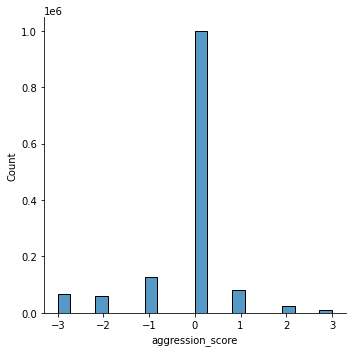

In [14]:
aggression_score_hist = sns.displot(aggression_annotations, x='aggression_score')
aggression_score_hist.savefig("AG_score_hist.png")

Here, when `common_norm=False` is not provided, the density is calculated to the entire distribution, which is not what we want. Since we want to be normalized by conditional distribution, we provide `common_norm=False` flag.

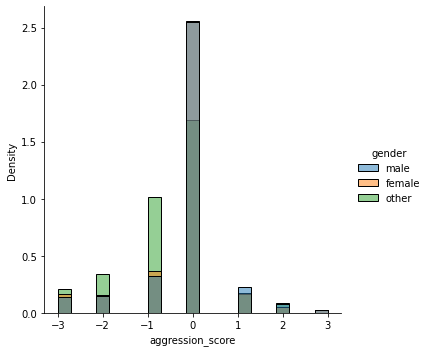

In [15]:
aggression_score_gender = sns.displot(merged_df, x="aggression_score", hue="gender", stat="density", common_norm=False)
aggression_score_gender.savefig("AG_aggression_score_by_gender.png")

We can also see the average aggression score here.

In [16]:
merged_df.groupby('gender')['aggression_score'].mean()

gender
female   -0.232734
male     -0.163730
other    -0.566265
Name: aggression_score, dtype: float64

It seems that we have a lower aggression score for female worker than that of male worker. However, in order to see if this is statistically significant, we would want to perform statistical testing.

# Step 2: Further implications

##  Q1
**Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?**

I believe the applications trained on this Wikimedia dataset would work poorly on other langauges other than English. In addition, since the corpus is about discussions in Wikipedia articles, it would not work well on other domains such as *chatbot, emails, or product reviews*. This is because the models depend heavily on the domain of the corpus. Since the domain of the corpus is discussions in Wikipedia articles, it would not work well on other domains. In order to improve the performance on other domains, one should collect more data on other domain.

## Q2
**Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?**

I belive the demo applications would work well in the Wikipedia domain, exactly where the dataset is extracted. This is because the trained models generally work well on the same domain that the model is trained on. Additionally, if there is a similar domain with the Wikepedia Talk corpus, the model would work quite well in a similar domain such as comments in other articles.

## Q3
**Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?**
As discussed previously, the models work well on specific domain trained on exactly the same corpus. If I were to improve the generality of the API, I would make API to first identify the domain, then do an inference on that identified domain (e.g. predict toxicity on emails). This hierarchical analysis would make the API perform better.